# Time Series Forecasting: AUTO REGRESSIVE Models

**Importing Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels
import sklearn
import matplotlib
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


**Importing the Dataset**

In [21]:
df = pd.read_csv('MaunaLoa.csv',parse_dates=['Year-Month'],index_col='Year-Month')

**Examining the Dataset**

In [22]:
df.head()

,CO2 ppm
Year-Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


In [23]:
df.tail()

,CO2 ppm
Year-Month,
1980-08-01,337.19
1980-09-01,335.49
1980-10-01,336.63
1980-11-01,337.74
1980-12-01,338.36


In [24]:
df.shape

(192, 1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 1965-01-01 to 1980-12-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CO2 ppm  192 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


We can see that the dataset goes from January 1965 to December 1980. This is the only column besides the CO2 ppm variable.

## Plotting the Data

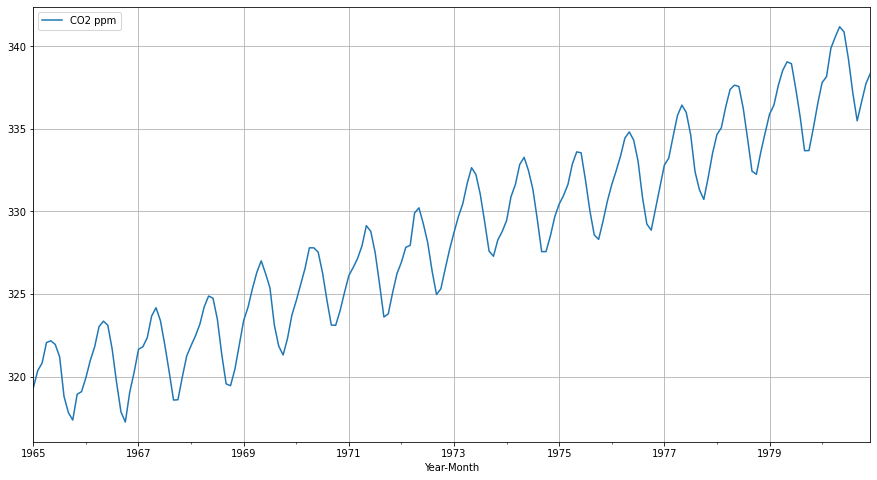

In [26]:
rcParams['figure.figsize'] = 15,8
df.plot()
plt.grid();

From the above graph, we can see that there is a seasonal component, with peaks around the end of first quarter and troughs around the end of the third quarter. We can also see a trend upwards in year over year shipping. 

In [27]:
df.describe()

,CO2 ppm
count,192.000000
mean,328.463958
std,5.962682
min,317.250000
25%,323.397500
50%,328.295000
75%,333.095000
max,341.190000


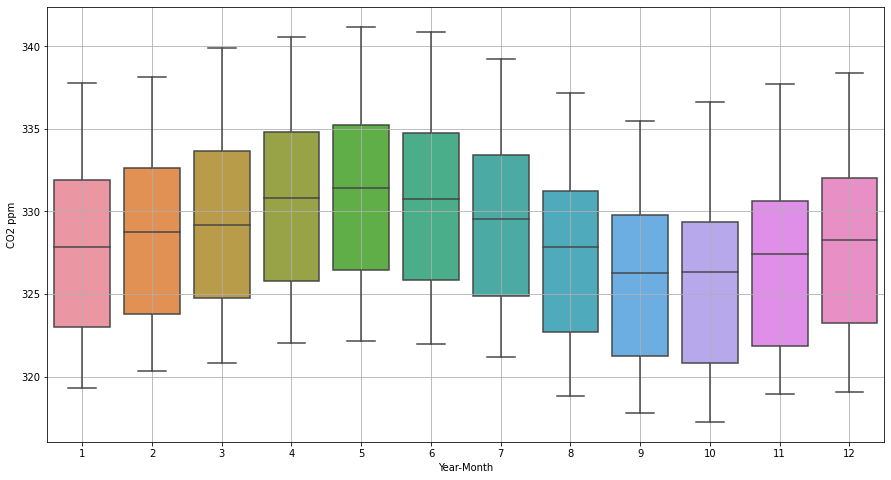

In [28]:
sns.boxplot(x=df.index.month,y=df['CO2 ppm'])
plt.grid();

Plotting a boxplot to understand the variation of Carbon Dioxide in parts per million with respect to months across years

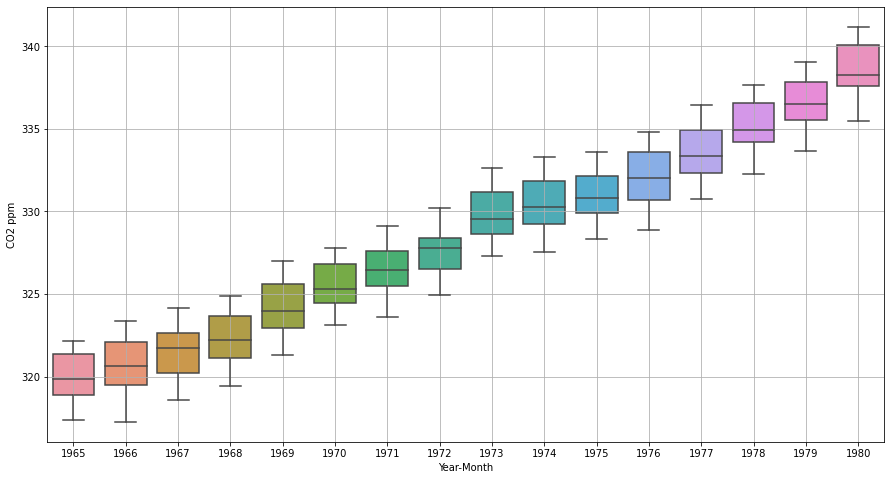

In [29]:
sns.boxplot(x=df.index.year,y=df['CO2 ppm'])
plt.grid();

Plotting a boxplot to understand the variation of Carbon Dioxide in parts per million across years.

In [31]:
monthly_co2ppm_across_years = pd.pivot_table(df, values = 'CO2 ppm', columns = df.index.month_name(), index = df.index.year)
monthly_co2ppm_across_years

Year-Month,April,August,December,February,January,July,June,March,May,November,October,September
Year-Month,,,,,,,,,,,,
1965,322.06,318.81,319.09,320.36,319.32,321.20,321.95,320.82,322.17,318.93,317.37,317.82
1966,323.03,319.64,320.26,320.98,319.94,321.65,323.11,321.81,323.36,319.06,317.25,317.86
1967,323.67,320.29,321.25,321.81,321.65,321.93,323.39,322.36,324.17,319.98,318.60,318.58
1968,324.23,321.34,321.92,322.47,321.88,323.47,324.75,323.17,324.88,320.45,319.45,319.56
1969,326.31,323.12,323.72,324.21,323.40,325.37,326.24,325.33,327.01,322.31,321.31,321.85
1970,327.80,324.63,325.09,325.57,324.60,326.28,327.54,326.55,327.80,323.99,323.11,323.12
1971,327.92,325.62,326.25,326.61,326.12,327.52,328.80,327.16,329.14,325.10,323.80,323.61
1972,329.91,326.39,327.71,327.83,326.93,328.11,329.25,327.95,330.22,326.54,325.32,324.97
1973,331.69,329.36,328.79,329.69,328.73,331.03,332.24,330.47,332.65,328.28,327.29,327.60


Creating a table of monthly Carbon Dioxide in parts per million across years

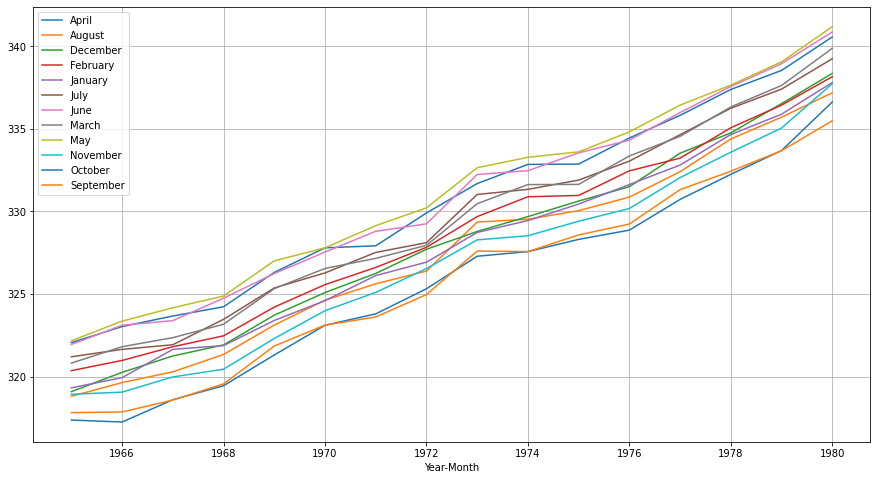

In [32]:
monthly_co2ppm_across_years.plot()
plt.grid()
plt.legend(loc='best');

Plotting a graph of monthly Carbon Dioxide in parts per million across years

**Decomposing the data**

We know from the above plots that there is a seasonal as well as year over year trend in the data.  We can decompose the data to examine these features more closely.

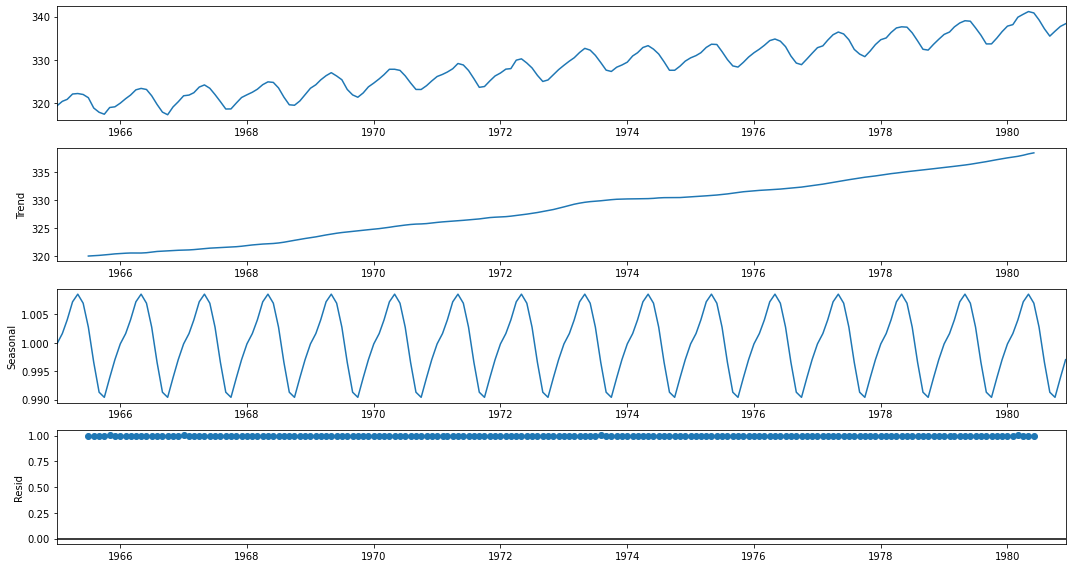

In [33]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

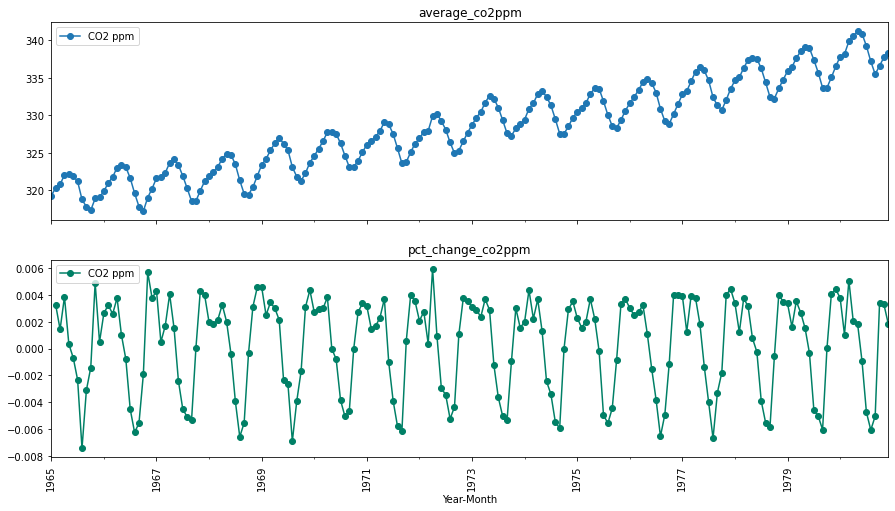

In [34]:
# group by date and get average Customers, and precent change
average_co2ppm    = df.groupby(df.index)["CO2 ppm"].mean()
pct_change_co2ppm = df.groupby(df.index)["CO2 ppm"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average CO2-ppm over time(year-month)
ax1 = average_co2ppm.plot(legend=True,ax=axis1,marker='o',title="average_co2ppm")

ax1.set_xticks(range(len(average_co2ppm)))
ax1.set_xticklabels(average_co2ppm.index.tolist(), rotation=90)

# plot precent change for CO2-ppm over time(year-month)
ax2 = pct_change_co2ppm.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="pct_change_co2ppm")

Plotting a graph of the average and percentage change of Carbon Dioxide in parts per million across years.

### Split the data into train and test and plot the training and test data

In [35]:
train = df[0:int(len(df)*0.75)] 
test = df[int(len(df)*0.75):]

In [36]:
print(train.shape)
print(test.shape)

(144, 1)
(48, 1)


Test the training data for stationarity using the Augmented Dickey-Fuller (ADF) test at  α  = 0.05.
If the data is non-stationary, use appropriate measures to stationarize the data and then check for stationarity using the Augmented Dickey-Fuller (ADF) Test at  α  = 0.05.

In [37]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

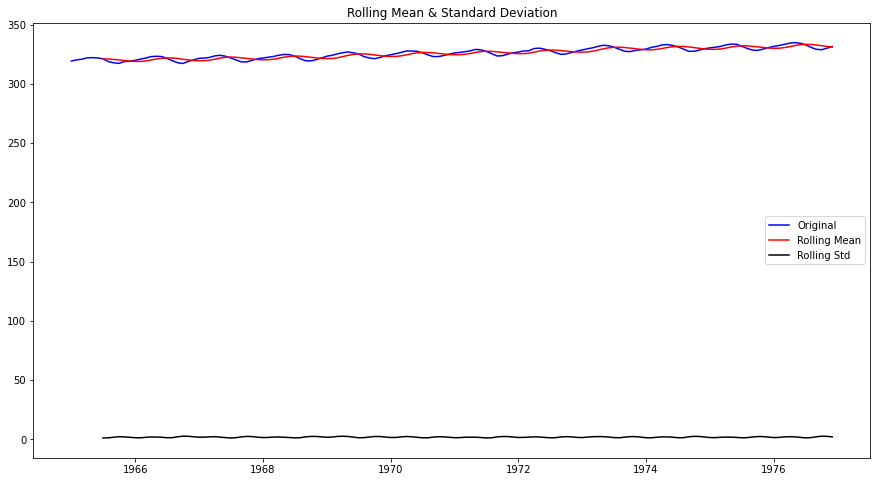

Results of Dickey-Fuller Test:
Test Statistic                  -0.257683
p-value                          0.931288
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [38]:
test_stationarity(train['CO2 ppm'])

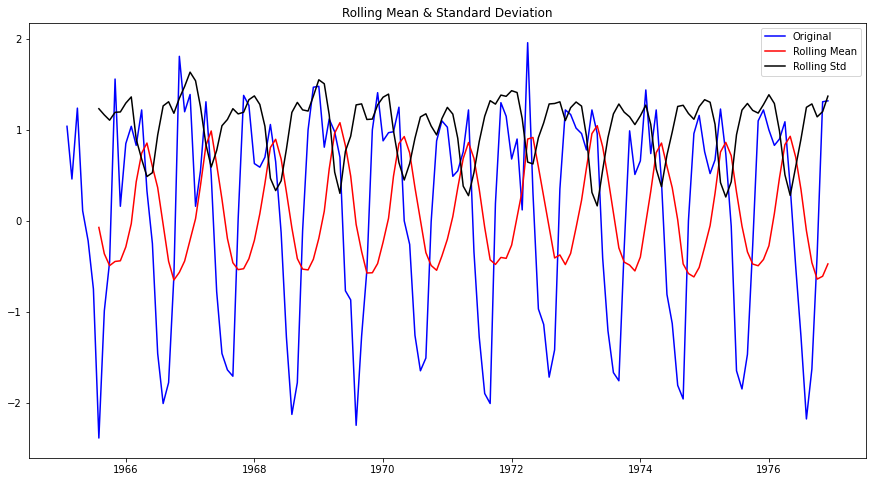

Results of Dickey-Fuller Test:
Test Statistic                  -3.386995
p-value                          0.011410
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 



In [39]:
test_stationarity(train.diff().dropna())

**Check the ACF and PACF of the training data**

In [40]:
train_diff = train.diff(periods=1).dropna()
train_diff

,CO2 ppm
Year-Month,
1965-02-01,1.04
1965-03-01,0.46
1965-04-01,1.24
1965-05-01,0.11
1965-06-01,-0.22
...,...
1976-08-01,-2.18
1976-09-01,-1.63
1976-10-01,-0.37


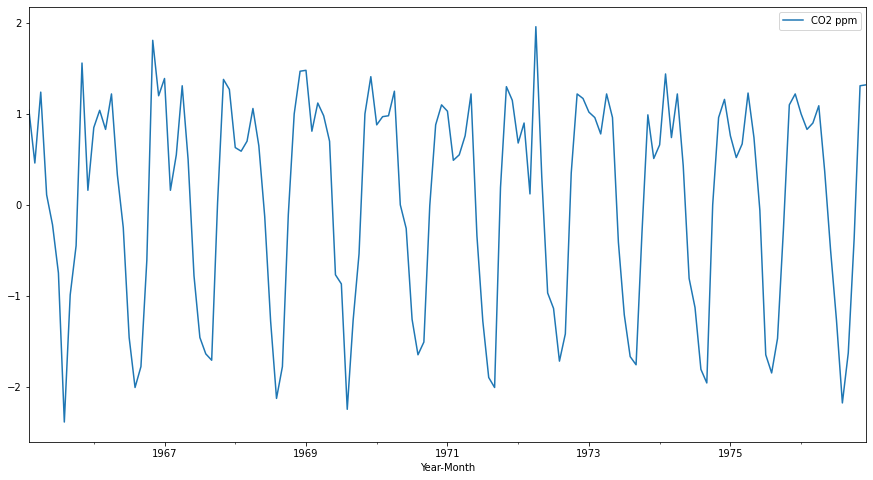

In [41]:
train_diff.plot();

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


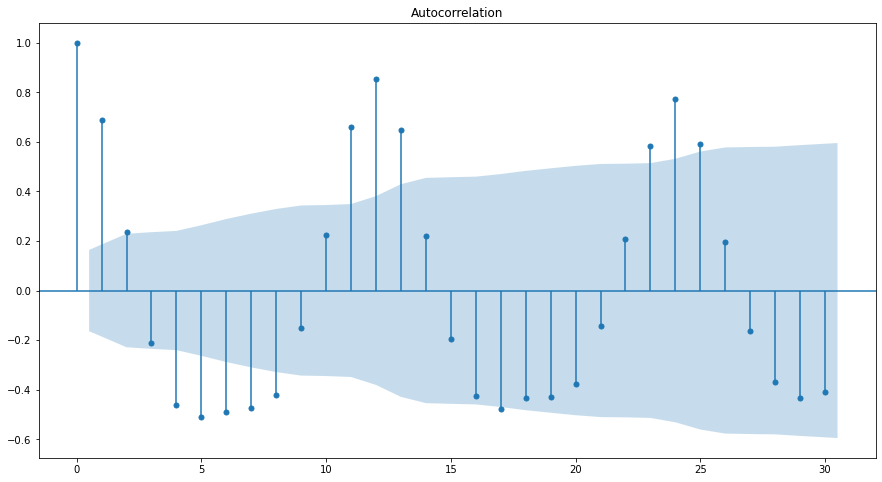

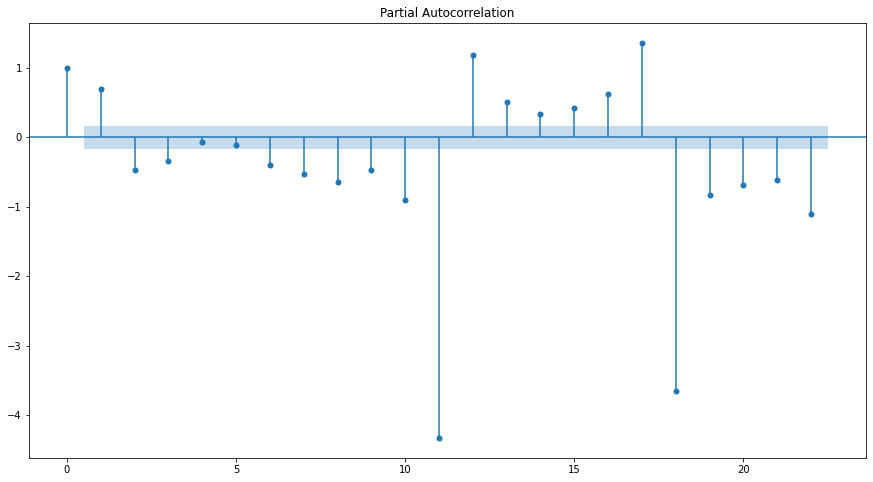

In [42]:
plot_acf(train_diff,lags=30)
plot_pacf(train_diff);

### Model 1: Build an Automated version of an ARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

[Here we have taken the range of values of p and q to be between 0 and 2]

In [43]:
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [44]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])

In [45]:
for param in pdq:
    ARIMA_model = ARIMA(train['CO2 ppm'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:444.71223526814674
ARIMA(0, 1, 1) - AIC:363.923396127008
ARIMA(0, 1, 2) - AIC:333.3929524230855
ARIMA(1, 1, 0) - AIC:352.77249617837214
ARIMA(1, 1, 1) - AIC:338.10742392866405
ARIMA(1, 1, 2) - AIC:327.25243019806896
ARIMA(2, 1, 0) - AIC:320.9728196750183
ARIMA(2, 1, 1) - AIC:285.00082931046563
ARIMA(2, 1, 2) - AIC:286.52001300824827


In [46]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
7,"(2, 1, 1)",285.000829
8,"(2, 1, 2)",286.520013
6,"(2, 1, 0)",320.972820
5,"(1, 1, 2)",327.252430
2,"(0, 1, 2)",333.392952
4,"(1, 1, 1)",338.107424
3,"(1, 1, 0)",352.772496
1,"(0, 1, 1)",363.923396
0,"(0, 1, 0)",444.712235


The best parameters is (2,1,1) since it has the lowest AIC

In [47]:
mod = ARIMA(train['CO2 ppm'], order=(2,1,1))

results_Arima = mod.fit()

print(results_Arima.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  144
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -138.500
Date:                Tue, 01 Mar 2022   AIC                            285.001
Time:                        13:50:10   BIC                            296.852
Sample:                    01-01-1965   HQIC                           289.817
                         - 12-01-1976                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5291      0.054     28.213      0.000       1.423       1.635
ar.L2         -0.8274      0.054    -15.320      0.000      -0.933      -0.722
ma.L1         -0.8291      0.066    -12.484      0.0

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


The above model is an AutoRegressive Integrated Moving Average model of order (2,1,1) i.e. the Time Series being regressed upon itself at a lag of 2, the errors from a lag of 1 and a lag and a degree or order differencing of 1 to make it stationary.

### Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE

In [48]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [49]:
predicted_autoARIMA = results_Arima.forecast(steps=len(test))
predicted_autoARIMA

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479460
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586489
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119942
1979-01-01    332.137074
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [50]:
results_Arima.predict(start=pd.to_datetime('1977-01-01'),end=pd.to_datetime('1980-12-01 '),typ = 'level',dynamic=True,full_results=True)

1977-01-01    332.717760
1977-02-01    333.487603
1977-03-01    333.657145
1977-04-01    333.279400
1977-05-01    332.561515
1977-06-01    331.776372
1977-07-01    331.169826
1977-08-01    330.892019
1977-09-01    330.969104
1977-10-01    331.316837
1977-11-01    331.784765
1977-12-01    332.212538
1978-01-01    332.479460
1978-02-01    332.533652
1978-03-01    332.395658
1978-04-01    332.139816
1978-05-01    331.862793
1978-06-01    331.650895
1978-07-01    331.556103
1978-08-01    331.586489
1978-09-01    331.711384
1978-10-01    331.877217
1978-11-01    332.027446
1978-12-01    332.119942
1979-01-01    332.137074
1979-02-01    332.086734
1979-03-01    331.995587
1979-04-01    331.897868
1979-05-01    331.823866
1979-06-01    331.791566
1979-07-01    331.803409
1979-08-01    331.848244
1979-09-01    331.906999
1979-10-01    331.959744
1979-11-01    331.991779
1979-12-01    331.997120
1980-01-01    331.978781
1980-02-01    331.946319
1980-03-01    331.911857
1980-04-01    331.886022


In [51]:
RMSE_autoARIMA = mean_squared_error(test['CO2 ppm'],predicted_autoARIMA,squared=False)
MAPE_autoARIMA = MAPE(test['CO2 ppm'],predicted_autoARIMA)

print('RMSE for the autofit ARIMA model:',RMSE_autoARIMA,'\nMAPE for the autofit ARIMA model:',MAPE_autoARIMA)

RMSE for the autofit ARIMA model: 4.753883497473523 
MAPE for the autofit ARIMA model: 1.2


In [52]:
resultsDf = pd.DataFrame({'RMSE': [RMSE_autoARIMA],'MAPE':[MAPE_autoARIMA]}
                           ,index=['ARIMA(2,1,1)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753883,1.2


### Model 2: Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) ARIMA model.

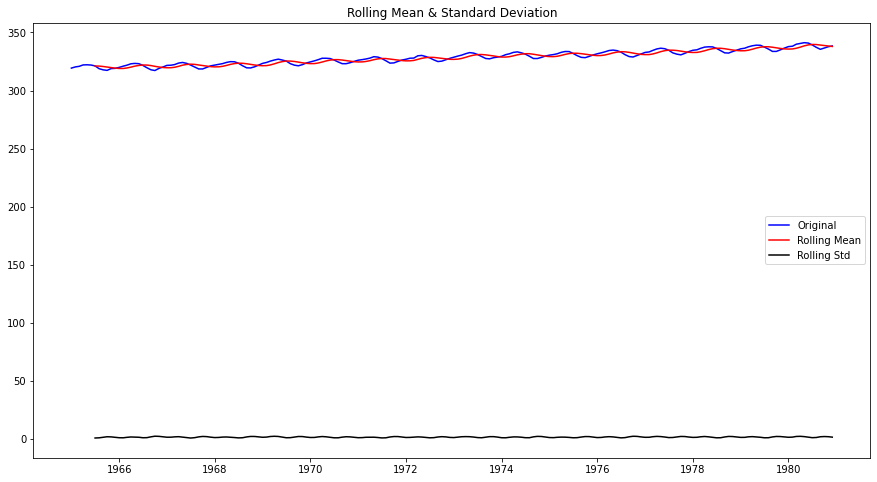

Results of Dickey-Fuller Test:
Test Statistic                   1.269677
p-value                          0.996434
#Lags Used                      12.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64 



In [53]:
test_stationarity(df['CO2 ppm'])

The data is NOT stationary. Therefore, we need to take steps to make it stationary. 

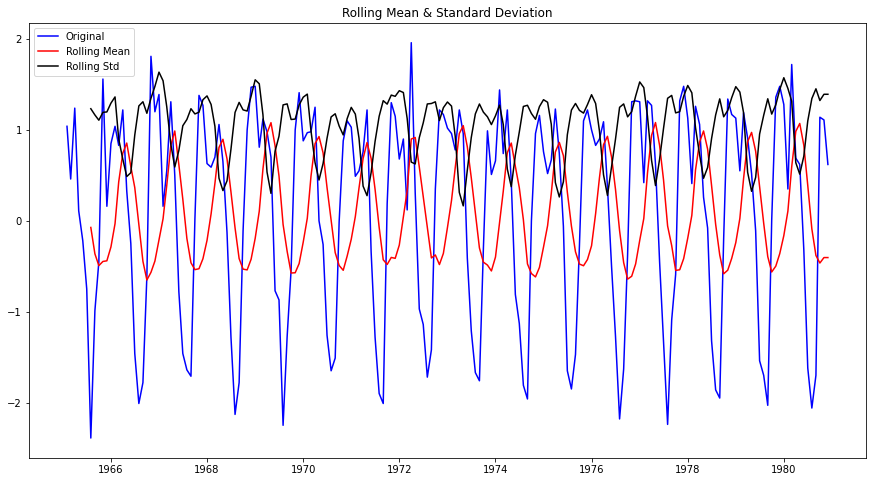

Results of Dickey-Fuller Test:
Test Statistic                  -4.750107
p-value                          0.000068
#Lags Used                      11.000000
Number of Observations Used    179.000000
Critical Value (1%)             -3.467420
Critical Value (5%)             -2.877826
Critical Value (10%)            -2.575452
dtype: float64 



In [54]:
test_stationarity(df['CO2 ppm'].diff().dropna())

The data is stationary using an Augmented Dickey-Fuller test after taking a differencing of order 1

In [55]:
full_model_autoARIMA = ARIMA(df['CO2 ppm'], order=(2,1,1))

results_Arima_full_model = full_model_autoARIMA.fit()

print(results_Arima_full_model.summary())

                               SARIMAX Results                                
Dep. Variable:                CO2 ppm   No. Observations:                  192
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -190.652
Date:                Tue, 01 Mar 2022   AIC                            389.305
Time:                        13:53:16   BIC                            402.314
Sample:                    01-01-1965   HQIC                           394.574
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5236      0.047     32.128      0.000       1.431       1.617
ar.L2         -0.8195      0.051    -16.209      0.000      -0.919      -0.720
ma.L1         -0.8203      0.061    -13.461      0.0

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


**Forecast the values for the next 24 months using the ARIMA model just built and plot them along with confidence intervals. Also, plot the existing time series data in this graph**

In [56]:
pred_dynamic = results_Arima_full_model.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)

In [57]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [58]:
pred95 = results_Arima_full_model.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [59]:
forecast_fullmodel_autoarima = pred95.predicted_mean

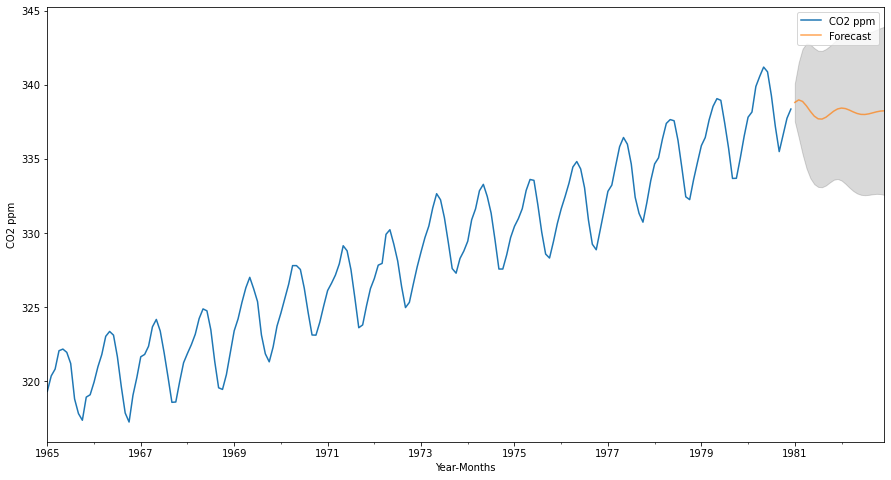

In [60]:
# plot the forecast along with the confidence band
axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autoarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autoarima.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

For a ARIMA model, we can see the predictions with 95% confidence interval bands. The seasonality was unable to be captured. Let us try out a SARIMA model.

### Model 3: Build an Automated version of an SARIMA model on the training data for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

[Here we have taken the range of values of p,q,P and Q to be between 0 and 2]

In [62]:
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [63]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [64]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:441.780622052286
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:322.99687478668636
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:232.00849360951068
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:151.72863155719017


C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:90.95070210760937
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:62.4139499230181
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:93.02503211735136


C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:66.07400558816627
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:62.910579806267144
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:358.6597354199755
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:284.8604635309881
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:209.13648708934386
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:151.73436845322743
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:84.83368704421389
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:65.43056347429834
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:92.63486093014244
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:63.53525671159351
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:63.87633736138184
SARIMA(0, 1, 2)x(0, 0, 0, 12)7 - AIC:325.10050932953664
SARIMA(0, 1, 2)x(0, 0, 1, 12)7 - AIC:260.0054450381243
SARIMA(0, 1, 2)x(0, 0, 2, 12)7 - AIC:195.26839010078191
SARIMA(0, 1, 2)x(1, 0, 0, 12)7 - AIC:152.6363576038059
SARIMA(0, 1, 2)x(1, 0, 1, 12)7 - AIC:86.70658449552265
SARIMA(0, 1, 2)x(1, 0, 2, 12)7 - AIC:67.92001501219178
SARIMA(0, 1, 2)x(2, 0, 0, 12)7 - AIC:94.52730035866918
SARIM

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(1, 1, 0)x(0, 0, 2, 12)7 - AIC:203.31196749001086
SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:151.80396967851226
SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:85.9234134199349
SARIMA(1, 1, 0)x(1, 0, 2, 12)7 - AIC:62.00400354990696
SARIMA(1, 1, 0)x(2, 0, 0, 12)7 - AIC:86.92115649925522
SARIMA(1, 1, 0)x(2, 0, 1, 12)7 - AIC:63.43424790365697
SARIMA(1, 1, 0)x(2, 0, 2, 12)7 - AIC:64.0903740179156
SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:333.40065014696216
SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:269.6307351857233
SARIMA(1, 1, 1)x(0, 0, 2, 12)7 - AIC:202.99247357358738
SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:146.1316077870328
SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:85.29404742221111
SARIMA(1, 1, 1)x(1, 0, 2, 12)7 - AIC:66.03407458161931
SARIMA(1, 1, 1)x(2, 0, 0, 12)7 - AIC:88.54458915765295
SARIMA(1, 1, 1)x(2, 0, 1, 12)7 - AIC:64.64513844579713
SARIMA(1, 1, 1)x(2, 0, 2, 12)7 - AIC:64.50812916885755
SARIMA(1, 1, 2)x(0, 0, 0, 12)7 - AIC:320.14850603658914
SARIMA(1, 1, 2)x(0, 0, 1, 12)7 - AIC:257.15917476410806
SARIMA

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 0)x(0, 0, 2, 12)7 - AIC:202.82919749475334
SARIMA(2, 1, 0)x(1, 0, 0, 12)7 - AIC:152.70790050024578
SARIMA(2, 1, 0)x(1, 0, 1, 12)7 - AIC:87.9714365371519
SARIMA(2, 1, 0)x(1, 0, 2, 12)7 - AIC:63.98588280769727
SARIMA(2, 1, 0)x(2, 0, 0, 12)7 - AIC:88.91363882226517
SARIMA(2, 1, 0)x(2, 0, 1, 12)7 - AIC:64.51158718363368
SARIMA(2, 1, 0)x(2, 0, 2, 12)7 - AIC:65.37626349621341
SARIMA(2, 1, 1)x(0, 0, 0, 12)7 - AIC:281.1352777147669
SARIMA(2, 1, 1)x(0, 0, 1, 12)7 - AIC:227.35187118809756
SARIMA(2, 1, 1)x(0, 0, 2, 12)7 - AIC:176.81891407356747
SARIMA(2, 1, 1)x(1, 0, 0, 12)7 - AIC:147.02442707885803
SARIMA(2, 1, 1)x(1, 0, 1, 12)7 - AIC:87.52231733740669
SARIMA(2, 1, 1)x(1, 0, 2, 12)7 - AIC:68.03121588211778
SARIMA(2, 1, 1)x(2, 0, 0, 12)7 - AIC:90.40462499002821
SARIMA(2, 1, 1)x(2, 0, 1, 12)7 - AIC:66.31244423169449
SARIMA(2, 1, 1)x(2, 0, 2, 12)7 - AIC:67.96399398447124
SARIMA(2, 1, 2)x(0, 0, 0, 12)7 - AIC:278.41928636693103
SARIMA(2, 1, 2)x(0, 0, 1, 12)7 - AIC:202.6054247315875
SARIM

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(2, 1, 2)x(1, 0, 1, 12)7 - AIC:87.80883000425266
SARIMA(2, 1, 2)x(1, 0, 2, 12)7 - AIC:69.48313446635898
SARIMA(2, 1, 2)x(2, 0, 0, 12)7 - AIC:91.13269238421815
SARIMA(2, 1, 2)x(2, 0, 1, 12)7 - AIC:68.39387668516824
SARIMA(2, 1, 2)x(2, 0, 2, 12)7 - AIC:68.32887497519967


In [65]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
32,"(1, 1, 0)","(1, 0, 2, 12)",62.004004
5,"(0, 1, 0)","(1, 0, 2, 12)",62.413950
8,"(0, 1, 0)","(2, 0, 2, 12)",62.910580
34,"(1, 1, 0)","(2, 0, 1, 12)",63.434248
16,"(0, 1, 1)","(2, 0, 1, 12)",63.535257


The best parameters are (1,1,0) and the best seasonal are (1,0,2,12)

In [66]:
mod = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA = mod.fit()
print(results_SARIMA.summary())

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -26.002
Date:                                 Tue, 01 Mar 2022   AIC                             62.004
Time:                                         13:56:14   BIC                             75.857
Sample:                                     01-01-1965   HQIC                            67.629
                                          - 12-01-1976                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1409      0.096     -1.466      0.143      -0.329       0

**Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE**

In [67]:
predicted_autoSARIMA = results_SARIMA.forecast(steps=len(test))
predicted_autoSARIMA

1977-01-01    332.381542
1977-02-01    333.136748
1977-03-01    333.801918
1977-04-01    334.976747
1977-05-01    335.545626
1977-06-01    335.078709
1977-07-01    333.867764
1977-08-01    332.097330
1977-09-01    330.496929
1977-10-01    330.391986
1977-11-01    331.495495
1977-12-01    332.606050
1978-01-01    333.518582
1978-02-01    334.271172
1978-03-01    334.959315
1978-04-01    336.116898
1978-05-01    336.661312
1978-06-01    336.199470
1978-07-01    334.983839
1978-08-01    333.177747
1978-09-01    331.586620
1978-10-01    331.449623
1978-11-01    332.568585
1978-12-01    333.696874
1979-01-01    334.600280
1979-02-01    335.348694
1979-03-01    336.032502
1979-04-01    337.182920
1979-05-01    337.723958
1979-06-01    337.264979
1979-07-01    336.056883
1979-08-01    334.261987
1979-09-01    332.680723
1979-10-01    332.544575
1979-11-01    333.656601
1979-12-01    334.777896
1980-01-01    335.675702
1980-02-01    336.419477
1980-03-01    337.099046
1980-04-01    338.242333


In [68]:
RMSE_autoSARIMA = mean_squared_error(test['CO2 ppm'],predicted_autoSARIMA,squared=False)
MAPE_autoSARIMA = MAPE(test['CO2 ppm'],predicted_autoSARIMA)

print('RMSE for the autofit SARIMA model:',RMSE_autoSARIMA,'\nMAPE for the autofit SARIMA model:',MAPE_autoSARIMA)

RMSE for the autofit SARIMA model: 1.5276216336376458 
MAPE for the autofit SARIMA model: 0.41


In [69]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA],'MAPE':[MAPE_autoSARIMA]}
                           ,index=['SARIMA(1, 1, 0)(1,0,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753883,1.20
"SARIMA(1, 1, 0)(1,0,2)12",1.527622,0.41


### Model 4: Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model.

In [70]:
mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel = mod.fit()
print(results_SARIMA_fullmodel.summary())

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood                 -45.995
Date:                                 Tue, 01 Mar 2022   AIC                            101.990
Time:                                         13:57:17   BIC                            117.550
Sample:                                     01-01-1965   HQIC                           108.306
                                          - 12-01-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2290      0.082     -2.798      0.005      -0.389      -0

**Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.**

In [71]:
pred_dynamic = results_SARIMA_fullmodel.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)

In [72]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [73]:
pred95 = results_SARIMA_fullmodel.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [74]:
forecast_fullmodel_autosarima = pred95.predicted_mean

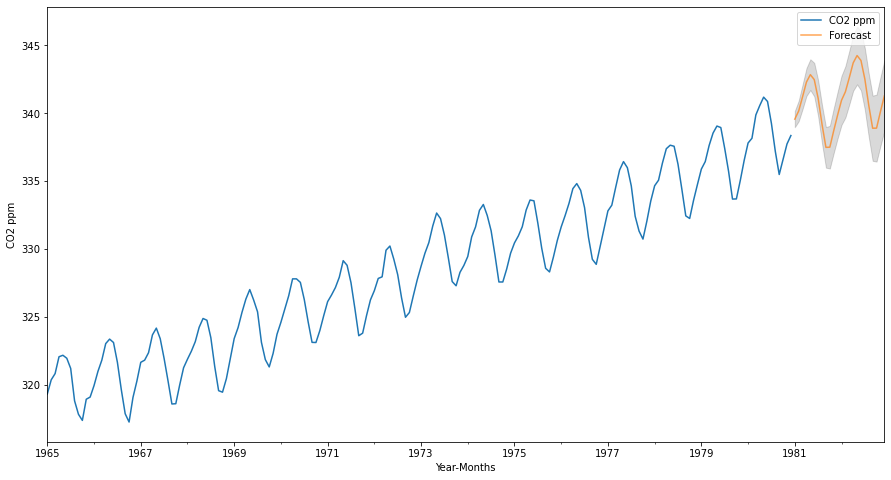

In [75]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

We see that we have certainly been able to take advantage of seasonality to get a better prediction with thinner confidence intervals.

### Model 5: Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model. Consider a degree of differencing on the Seasonal scale as well.

In [76]:
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [77]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])

In [78]:
for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['CO2 ppm'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:153.20624323260782
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:65.42885364685287
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:51.13488254834025
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:92.83358563544205
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:60.08360740893913
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:51.61940235750142
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:68.90731982413931
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:55.75059887015926
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:53.81162149815457
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:150.89294302803074
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:59.907221733548646
SARIMA(0, 1, 1)x(0, 1, 2, 12)7 - AIC:54.50734804875241
SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:91.90566699465556
SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:56.67952520902503
SARIMA(0, 1, 1)x(1, 1, 2, 12)7 - AIC:53.907017487882385
SARIMA(0, 1, 1)x(2, 1, 0, 12)7 - AIC:69.00017281189926
SARIMA(0, 1, 1)x(2, 1, 1, 12)7 - AIC:56.16075218502799
SARIMA(0, 1, 1)x(2, 1, 2, 12)7 - AIC:54.21078245165448
SARIMA

In [79]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
29,"(1, 1, 0)","(0, 1, 2, 12)",50.786119
2,"(0, 1, 0)","(0, 1, 2, 12)",51.134883
5,"(0, 1, 0)","(1, 1, 2, 12)",51.619402
56,"(2, 1, 0)","(0, 1, 2, 12)",52.771194
32,"(1, 1, 0)","(1, 1, 2, 12)",53.232663


The best parameters are (1,1,0) and the best seasonal are (0,1,2,12)

In [80]:
mod = sm.tsa.statespace.SARIMAX(train['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_ses_diff = mod.fit()
print(results_SARIMA_ses_diff.summary())

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -21.393
Date:                                 Tue, 01 Mar 2022   AIC                             50.786
Time:                                         13:59:27   BIC                             61.440
Sample:                                     01-01-1965   HQIC                            55.104
                                          - 12-01-1976                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1483      0.093     -1.601      0.109      -0.330       0

**Predict on the Test Set using this model and evaluate the model on the test set using RMSE and MAPE.**

In [82]:
predicted_autoSARIMA_ses_diff = results_SARIMA_ses_diff.forecast(steps=len(test))
predicted_autoSARIMA_ses_diff

1977-01-01    332.420132
1977-02-01    333.210511
1977-03-01    333.904345
1977-04-01    335.130920
1977-05-01    335.725439
1977-06-01    335.237644
1977-07-01    333.974148
1977-08-01    332.126621
1977-09-01    330.456482
1977-10-01    330.347826
1977-11-01    331.497227
1977-12-01    332.654666
1978-01-01    333.602775
1978-02-01    334.391743
1978-03-01    335.110336
1978-04-01    336.320634
1978-05-01    336.890536
1978-06-01    336.407605
1978-07-01    335.137292
1978-08-01    333.250252
1978-09-01    331.587514
1978-10-01    331.445262
1978-11-01    332.612509
1978-12-01    333.790153
1979-01-01    334.735265
1979-02-01    335.524677
1979-03-01    336.243204
1979-04-01    337.453512
1979-05-01    338.023413
1979-06-01    337.540482
1979-07-01    336.270169
1979-08-01    334.383129
1979-09-01    332.720391
1979-10-01    332.578139
1979-11-01    333.745386
1979-12-01    334.923030
1980-01-01    335.868142
1980-02-01    336.657554
1980-03-01    337.376081
1980-04-01    338.586389


In [83]:
RMSE_autoSARIMA_ses_diff = mean_squared_error(test['CO2 ppm'],predicted_autoSARIMA_ses_diff)
MAPE_autoSARIMA_ses_diff = MAPE(test['CO2 ppm'],predicted_autoSARIMA_ses_diff)

print('RMSE for the autofit seasonal differenced SARIMA model:',RMSE_autoSARIMA_ses_diff,'\nMAPE for the autofit ARIMA model:',MAPE_autoSARIMA_ses_diff)

RMSE for the autofit seasonal differenced SARIMA model: 1.8855832869416647 
MAPE for the autofit ARIMA model: 0.36


In [84]:
temp_resultsDf = pd.DataFrame({'RMSE': [RMSE_autoSARIMA_ses_diff],'MAPE':[MAPE_autoSARIMA_ses_diff]}
                           ,index=['SARIMA(1, 1, 0)(0,1,2)12'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,RMSE,MAPE
"ARIMA(2,1,1)",4.753883,1.20
"SARIMA(1, 1, 0)(1,0,2)12",1.527622,0.41
"SARIMA(1, 1, 0)(0,1,2)12",1.885583,0.36


### Model 6: Build a model on the whole data using the parameters got from best fit (with respect to the lowest AIC value) SARIMA model

In [85]:
mod = sm.tsa.statespace.SARIMAX(df['CO2 ppm'],
                                order=(1,1,0),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_SARIMA_fullmodel_ses_diff = mod.fit()
print(results_SARIMA_fullmodel_ses_diff.summary())

C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\mulli\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                        SARIMAX Results                                        
Dep. Variable:                                 CO2 ppm   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(0, 1, [1, 2], 12)   Log Likelihood                 -40.590
Date:                                 Tue, 01 Mar 2022   AIC                             89.181
Time:                                         14:01:03   BIC                            101.328
Sample:                                     01-01-1965   HQIC                            94.115
                                          - 12-01-1980                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2441      0.083     -2.937      0.003      -0.407      -0

**Forecast the values for the next 24 months using the SARIMA model built and plot them along with confidence intervals. Also, plot the existing time series data in this graph.**

In [86]:
pred_dynamic = results_SARIMA_fullmodel_ses_diff.get_prediction(start=pd.to_datetime('1981-01-01'), dynamic=True, full_results=True)

In [87]:
pred_dynamic_ci = pred_dynamic.conf_int()

In [88]:
pred95 = results_SARIMA_fullmodel_ses_diff.get_forecast(steps=24, alpha=0.05)
pred_ci_95 = pred95.conf_int()

In [89]:
forecast_fullmodel_autosarima_ses_diff = pred95.predicted_mean

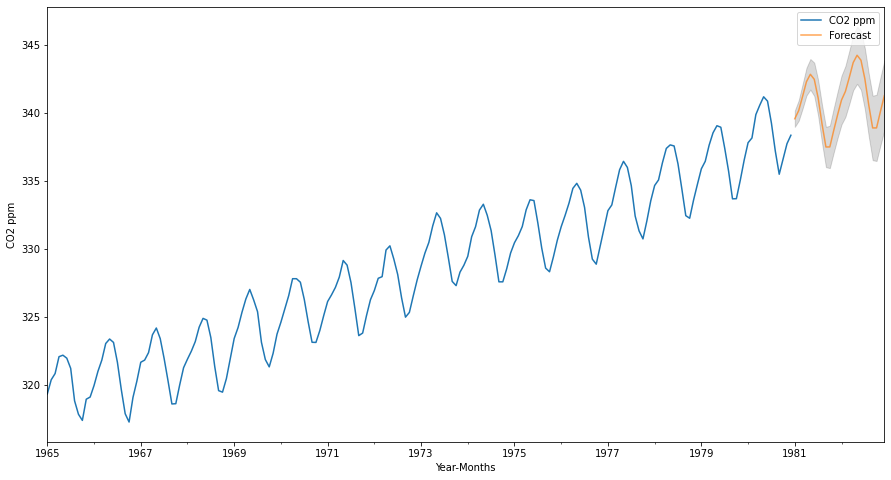

In [90]:
# plot the forecast along with the confidence band

axis = df.plot(label='Observed', figsize=(15, 8))
forecast_fullmodel_autosarima_ses_diff.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(forecast_fullmodel_autosarima_ses_diff.index, pred_ci_95['lower CO2 ppm'], pred_ci_95['upper CO2 ppm'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('CO2 ppm')
plt.legend(loc='best')
plt.show()

## Observations

We saw that differencing on the seasonal scale helped make the model more accurate on the test data.